In [1]:
!pip install -r requirements.txt --quiet


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [2]:
%matplotlib inline
import pymc as pm
import numpy as np
import pandas as pd
from scipy.stats import norm
from scipy.special import logsumexp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import arviz as az
import networkx as nx
import collections.abc
collections.Iterable = collections.abc.Iterable
from causalgraphicalmodels import CausalGraphicalModel
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
from matplotlib.patches import FancyArrowPatch

import warnings
warnings.filterwarnings('ignore')


%config InlineBackend.figure_format = 'retina'

plt.style.use(['seaborn-v0_8-darkgrid','seaborn-v0_8-colorblind'])

#### Code 10.1

In [ ]:
p = pd.DataFrame({
    'A': [0,0,10,0,0],
    'B': [0,1,8,1,0],
    'C': [0,2,6,2,0],
    'D': [0,3,4,3,0],
    'E': [0,4,2,4,0],
    'F': [0,5,0,5,0]
})

#### Code 10.2

In [27]:
p_norm = p / p.sum()

#### Code 10.3

In [28]:
H = p_norm.apply(lambda p: -np.sum(np.where(p == 0, 0, p * np.log(p))))
H

A   -0.000000
B    0.639032
C    0.950271
D    1.088900
E    1.054920
F    0.693147
dtype: float64

#### Code 10.4

In [29]:
ways = [1,90,1260,37800,113400]
logwayspp = np.log(ways)/10

#### Code 10.5

In [32]:
p = pd.DataFrame({
    '1': [1/4,1/4,1/4,1/4],
    '2': [2/6,1/6,1/6,2/6],
    '3': [1/6,2/6,2/6,1/6],
    '4': [1/8,4/8,2/8,1/8]
})

p.apply(lambda p: np.sum(p*[0,1,1,2]))


1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

#### Code 10.6

In [31]:
p.apply(lambda p: -np.sum(np.where(p == 0, 0, p * np.log(p))))

1    1.386294
2    1.329661
3    1.329661
4    1.213008
dtype: float64

#### Code 10.7

In [33]:
p = .7
A = [(1-p)**2, p*(1-p), (1-p)*p, p**2]

#### Code 10.8

In [34]:
-np.sum(A*np.log(A))

1.221728604109787

#### Code 10.9

In [ ]:
def sim_p(G=1.4):
    x123 = np.random.uniform(0, 1, 3)
    x4 = (G * np.sum(x123) - x123[1] - x123[2]) / (2 - G)
    z = np.sum(x123) + x4
    p = np.concatenate([x123, [x4]]) / z
    H = -np.sum(np.where(p == 0, 0, p * np.log(p)))
    return {'H': H, 'p': p}

#### Code 10.10

[{'H': 1.1112275058013117, 'p': array([0.15786719, 0.05294033, 0.23132529, 0.55786719])}
 {'H': 1.1112275058013117, 'p': array([0.15786719, 0.05294033, 0.23132529, 0.55786719])}
 {'H': 1.1112275058013117, 'p': array([0.15786719, 0.05294033, 0.23132529, 0.55786719])}
 ...
 {'H': 1.1112275058013117, 'p': array([0.15786719, 0.05294033, 0.23132529, 0.55786719])}
 {'H': 1.1112275058013117, 'p': array([0.15786719, 0.05294033, 0.23132529, 0.55786719])}
 {'H': 1.1112275058013117, 'p': array([0.15786719, 0.05294033, 0.23132529, 0.55786719])}]


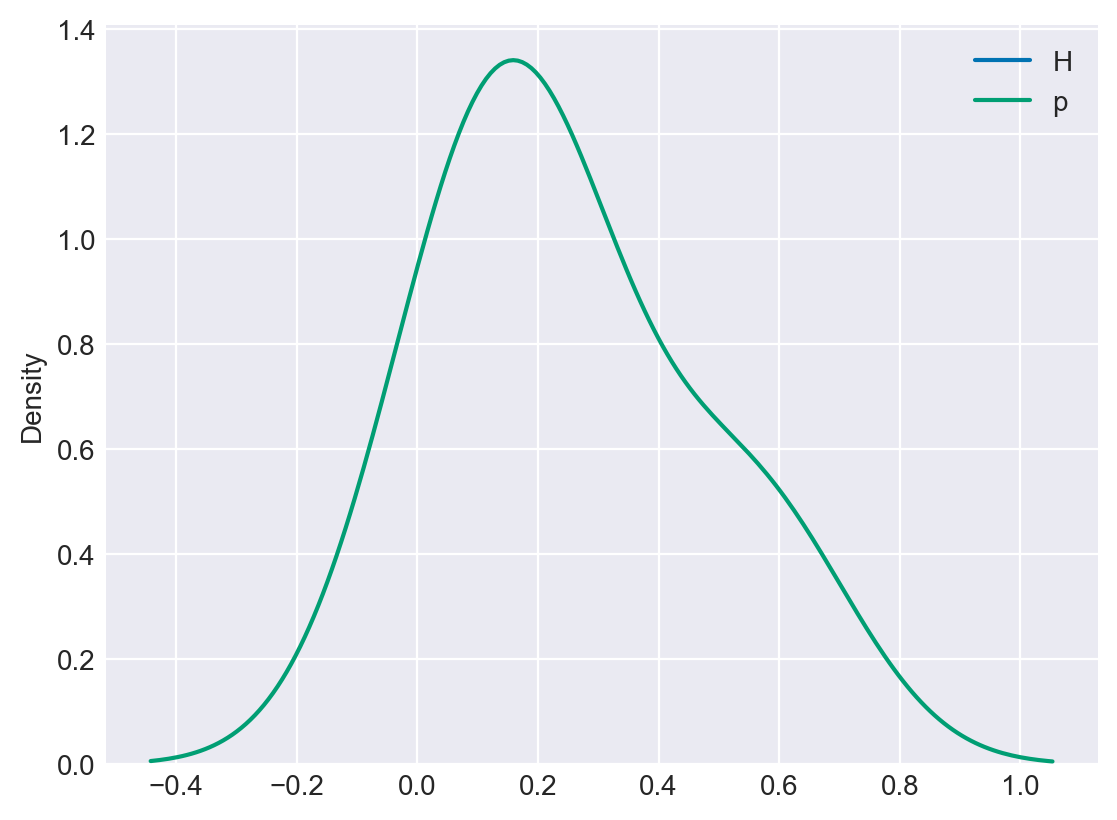

In [50]:
H = np.repeat(sim_p(1.4), 10000 )
print(H)
sns.kdeplot(H[1,]);

#### Code 10.11

In [52]:
entropies = H[0,]
distributions = H[1,]

#### Code 10.12

In [53]:
entropies.max()

AttributeError: 'dict' object has no attribute 'max'

#### Code 10.13

In [54]:
distributions[entropies.argmax()]

AttributeError: 'dict' object has no attribute 'argmax'